In [1]:
#Importing required packages
import numpy as np
import pandas as pd
from pyBKT.models import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Installed pyBKT from pip

#pip install pyBKT

In [2]:
#Seed chosen to consistently replicate results (avoiding randomness)
model = Model(seed = 60, num_fits = 1)

In [3]:
#Fetching the dataset from github
model.fetch_dataset("https://raw.githubusercontent.com/lishaparmar13/H5P-Enhanced-BKT/main/CS.csv",'.')

In [4]:
df= pd.read_csv(r"CS.csv", encoding ='latin')
df.head(5)


,ï»¿Row,Anon Student Id,Age,Problem Hierarchy,Problem Name,question_id,Step Start Time,Step End Time,Correct First Attempt,Step Duration (sec),Answer Type,KC(Default),Opportunity (Default),skill_id,template_id
0,2,2,13,1,Perimeter,1,11-07-2023 07:25,11-07-2023 07:27,1,60,Single Choice set,Geometry,1,9,6
1,17,17,13,1,Perimeter,1,18-07-2023 04:22,18-07-2023 04:28,1,300,Single Choice set,Geometry,1,9,6
2,19,19,13,1,Perimeter,1,20-07-2023 04:23,20-07-2023 04:23,1,5,Single Choice set,Geometry,1,9,6
3,16,16,14,1,Perimeter,1,17-07-2023 14:25,17-07-2023 14:26,1,42,Single Choice set,Geometry,1,9,6
4,18,18,14,1,Perimeter,1,18-07-2023 21:15,18-07-2023 21:16,1,60,Single Choice set,Geometry,1,9,6


In [5]:
#Spliting the data to be later used for predictions
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [6]:
#Fitting the model using training dataset
model.fit(data = train_df)

In [7]:
#List of all skill names from the dataset
print("Fitted Skills:\n%s" % '\n'.join(model.coef_.keys()))

Fitted Skills:
Algebra and Fractions
Algebra
Numbers and Geometry and Percentages
Ratio and Proportion
Numbers and Algebra and Fractions
Fractions
Numbers and Percentages and Ratio and Proportion
Numbers and Geometry and Fractions
Geometry


In [8]:
#Can be used to find a particular match based on skill name mentioned
model.fit(data= train_df, skills = ".*Fractions.*")
print("Fitted Skills:\n%s" % '\n'.join(model.coef_.keys()))

Fitted Skills:
Algebra and Fractions
Numbers and Algebra and Fractions
Fractions
Numbers and Geometry and Fractions


In [9]:
# Evaluate with the default RMSE then specify AUC.
model.fit(data = train_df)
training_rmse = model.evaluate(data = df)
training_auc = model.evaluate(data = train_df, metric = 'auc')
print("Training RMSE: %f" % training_rmse)
print("Training AUC: %f" % training_auc)

Training RMSE: 0.519347
Training AUC: 0.627256


In [10]:
#define own metric
def mae(true_vals, pred_vals):
  """ Calculates the mean absolute error. """
  return np.mean(np.abs(true_vals - pred_vals))

training_mae = model.evaluate(data = train_df, metric = mae)
print("Training MAE: %f" % training_mae)

Training MAE: 0.478968


In [11]:
#Uses default as RMSE method.
model.evaluate(data = df)

0.5193468065383063

In [12]:
model.evaluate(data=df, metric=['rmse','accuracy','auc', 'mean_absolute_error'])

[0.5193468065383063,
 0.6615384615384615,
 0.5881732439811367,
 0.5087881916911207]

Model Prediction

In [13]:
model = Model(seed = 60, num_fits = 1)

In [14]:
model.fit(data = train_df) #Trained on all skills
preds = model.predict(data = test_df)
preds[['Anon Student Id', 'KC(Default)', 'Correct First Attempt', 
       'correct_predictions', 'state_predictions']].head(10)

,Anon Student Id,KC(Default),Correct First Attempt,correct_predictions,state_predictions
6,1,Geometry,1,0.50000,0.24818
104,2,Fractions,1,0.50000,0.41115
68,3,Algebra,0,0.31625,0.63489
173,4,Numbers and Geometry and Percentages,1,0.50000,0.35531
33,5,Ratio and Proportion,1,0.50000,0.39989
46,6,Ratio and Proportion,1,0.50000,0.39989
228,6,Numbers and Percentages and Ratio and Proportion,0,0.50000,0.76408
150,6,Algebra and Fractions,0,0.50000,0.29396
177,7,Numbers and Geometry and Percentages,1,0.50000,0.35531
190,8,Numbers and Geometry and Fractions,1,0.50000,0.79443


In [15]:
# Checking for all skills that have been trained and used for predict
preds[preds['correct_predictions'] != 0.5]['KC(Default)'].unique()

array(['Algebra'], dtype=object)

Model Cross-Validation and Variants

Crossvalidation is offered as a blackbox function similar to a combination of fit and evaluate that accepts a particular number of folds, a seed, and a metric 

In [16]:
# Note that folds is an optional parameter as well as the model 
# variant, seed, and crossvalidated metric.
# By default, we crossvalidate on all skills separately.
model.crossvalidate(data= df, folds = 5)

,rmse
skill,
Geometry,0.50000
Ratio and Proportion,0.50000
Algebra,0.34963
Fractions,0.50000
Algebra and Fractions,0.50000
Numbers and Geometry and Percentages,0.50000
Numbers and Geometry and Fractions,0.50000
Numbers and Percentages and Ratio and Proportion,0.50000
Numbers and Algebra and Fractions,0.50000


In [17]:
# Note that folds is an optional parameter as well as the model 
# variant, seed, and crossvalidated metric.
# By default, we crossvalidate on all skills separately.
model.crossvalidate(data=df, folds = 3)

,rmse
skill,
Geometry,0.50000
Ratio and Proportion,0.50000
Algebra,0.35359
Fractions,0.50000
Algebra and Fractions,0.50000
Numbers and Geometry and Percentages,0.50000
Numbers and Geometry and Fractions,0.50000
Numbers and Percentages and Ratio and Proportion,0.50000
Numbers and Algebra and Fractions,0.50000


Exploring all the model variants offered within pyBKT for one particular skill (Algebra) using cross-validation since it provides a much better evaluation of true model performance during test time than the training loss!

In [18]:
model = Model(seed = 60, num_fits = 1)

In [19]:
# Try this with a different skill or metric by replacing the lines below.
skill = 'Algebra'
metric = 'rmse'

simple_cv = model.crossvalidate(data = test_df, skills = skill, 
                                metric = metric)
simple_cv

,rmse
skill,
Algebra,0.52208


1. KT-IDEM - *multigs*

In [20]:
model = Model(seed = 60, num_fits = 1)
multigs_cv = model.crossvalidate(data= test_df, skills = skill,
                                 multigs = True, metric = metric)
multigs_cv

,rmse
skill,
Algebra,0.40000


2. Item Learning Effect - *multilearn*

In [21]:
model = Model(seed = 60, num_fits = 1)
multilearn_cv = model.crossvalidate(data= test_df, skills = skill,
                                    multilearn ="question_id", 
                                    metric = metric)
multilearn_cv

,rmse
skill,
Algebra,0.40085


3. KT-PPS - *multiprior*
4. Item Order Effect - *multipair*

In [22]:
model = Model(seed = 60, num_fits = 1)
# The multiprior model generates different priors based on the first 
# response of each student.
multiprior_cv = model.crossvalidate(data= test_df, skills = skill,
                                    multiprior = True, metric = metric,
                                    folds = 3)
                                    
model = Model(seed = 60, num_fits = 1)
multipair_cv = model.crossvalidate(data = test_df, skills = skill,
                                   multipair = True, metric = metric,
                                   folds = 3)

pd.concat([multiprior_cv, multipair_cv], axis = 0)

,rmse
skill,
Algebra,0.00000
Algebra,0.50002


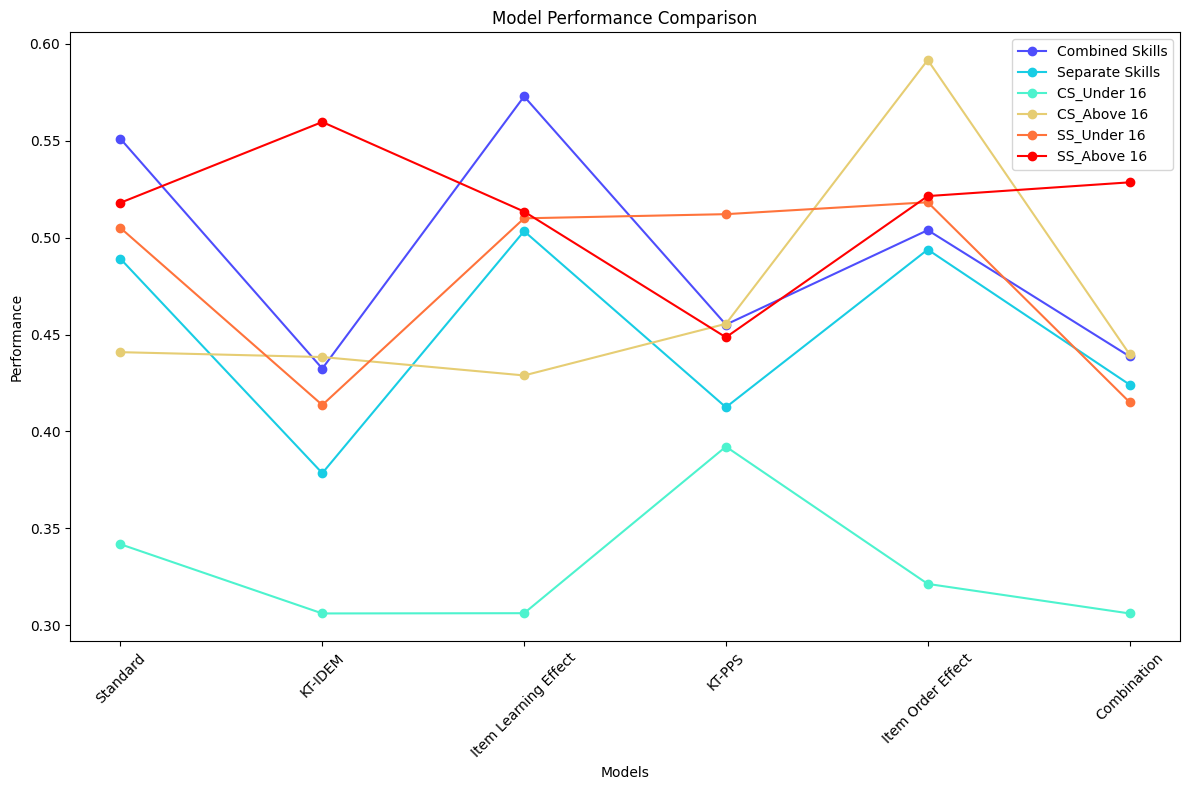

In [23]:
import matplotlib.pyplot as plt

# Data
models = ['Standard', 'KT-IDEM', 'Item Learning Effect', 'KT-PPS', 'Item Order Effect', 'Combination']
combined_skills = [0.55087, 0.43244, 0.57276, 0.45511, 0.50381, 0.43873]
separate_skills = [0.48903, 0.37853, 0.50329, 0.41249, 0.49380, 0.42418]
cs_under_16 = [0.34187, 0.30619, 0.30632, 0.39220, 0.32142, 0.30619]
cs_above_16 = [0.44090, 0.43839, 0.42890, 0.45552, 0.59153, 0.43985]
ss_under_16 = [0.50494, 0.41366, 0.50991, 0.51205, 0.51819, 0.41514]
ss_above_16 = [0.51795, 0.55957, 0.51338, 0.44856, 0.52137, 0.52846]

# Create line plots with specified colors
plt.figure(figsize=(12, 8))

# Create a list of colors in rainbow order
colors = plt.cm.rainbow([0.1, 0.3, 0.4, 0.7, 0.85, 1.1])

plt.plot(models, combined_skills, marker='o', label='Combined Skills', color=colors[0])
plt.plot(models, separate_skills, marker='o', label='Separate Skills', color=colors[1])
plt.plot(models, cs_under_16, marker='o', label='CS_Under 16', color=colors[2])
plt.plot(models, cs_above_16, marker='o', label='CS_Above 16', color=colors[3])
plt.plot(models, ss_under_16, marker='o', label='SS_Under 16', color=colors[4])
plt.plot(models, ss_above_16, marker='o', label='SS_Above 16', color=colors[5])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Performance')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


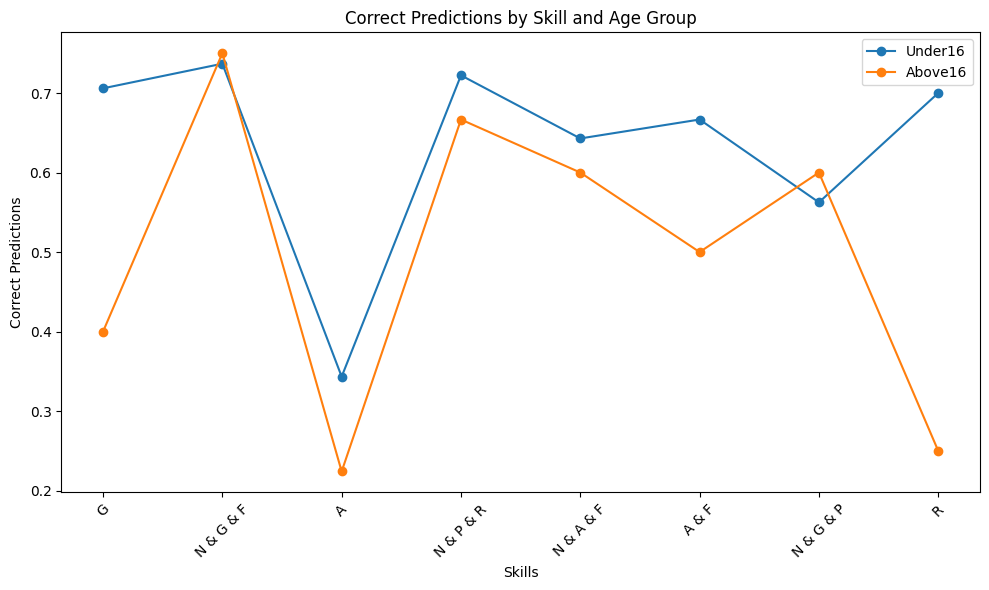

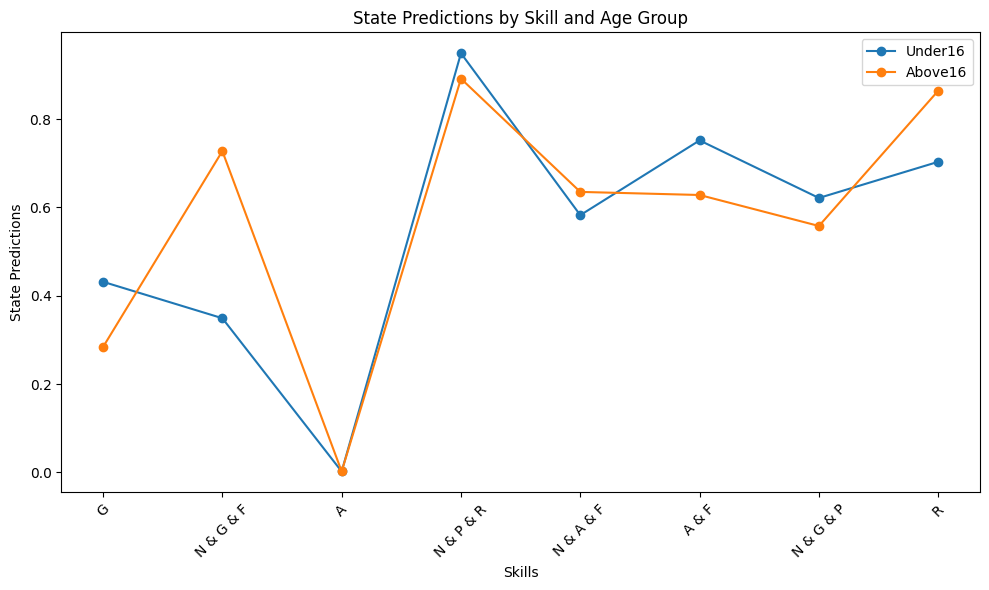

In [24]:
import matplotlib.pyplot as plt

# Data (replace with your actual data)
skills = ['G', 'N & G & F', 'A',
          'N & P & R', 'N & A & F', 'A & F', 'N & G & P', 'R']
under16_correct = [0.70588, 0.73684, 0.34334, 0.72222, 0.64286, 0.66667, 0.56250, 0.70000]
above16_correct = [0.40000, 0.75000, 0.22411, 0.66667, 0.60000, 0.50000, 0.60000, 0.25000]
under16_state = [0.43162, 0.34910, 0.00202, 0.94924, 0.58256, 0.75186, 0.62147, 0.70336]
above16_state = [0.28383, 0.72760, 0.00210, 0.89165, 0.63521, 0.62821, 0.55802, 0.86443]

# Create line plots for correct predictions
plt.figure(figsize=(10, 6))
plt.plot(skills, under16_correct, marker='o', label='Under16')
plt.plot(skills, above16_correct, marker='o', label='Above16')
plt.xlabel('Skills')
plt.ylabel('Correct Predictions')
plt.title('Correct Predictions by Skill and Age Group')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Create line plots for state predictions
plt.figure(figsize=(10, 6))
plt.plot(skills, under16_state, marker='o', label='Under16')
plt.plot(skills, above16_state, marker='o', label='Above16')
plt.xlabel('Skills')
plt.ylabel('State Predictions')
plt.title('State Predictions by Skill and Age Group')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


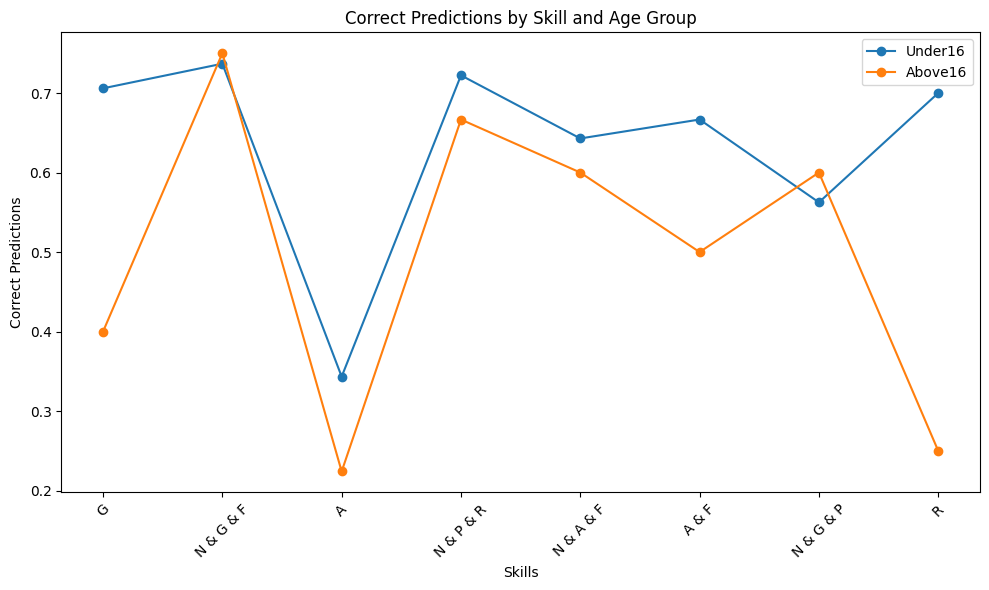

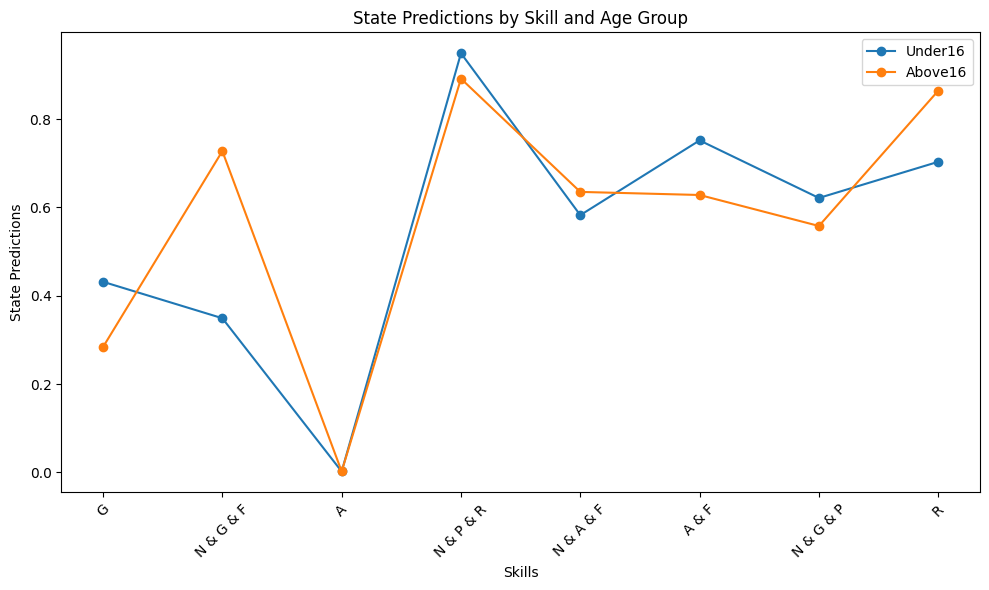

In [25]:
import matplotlib.pyplot as plt

# Data (replace with your actual data)
skills = ['G', 'N & G & F', 'A',
          'N & P & R', 'N & A & F', 'A & F', 'N & G & P', 'R']
under16_correct = [0.70588, 0.73684, 0.34334, 0.72222, 0.64286, 0.66667, 0.56250, 0.70000]
above16_correct = [0.40000, 0.75000, 0.22411, 0.66667, 0.60000, 0.50000, 0.60000, 0.25000]
under16_state = [0.43162, 0.34910, 0.00202, 0.94924, 0.58256, 0.75186, 0.62147, 0.70336]
above16_state = [0.28383, 0.72760, 0.00210, 0.89165, 0.63521, 0.62821, 0.55802, 0.86443]

# Create line plots for correct predictions
plt.figure(figsize=(10, 6))
plt.plot(skills, under16_correct, marker='o', label='Under16')
plt.plot(skills, above16_correct, marker='o', label='Above16')
plt.xlabel('Skills')
plt.ylabel('Correct Predictions')
plt.title('Correct Predictions by Skill and Age Group')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Create line plots for state predictions
plt.figure(figsize=(10, 6))
plt.plot(skills, under16_state, marker='o', label='Under16')
plt.plot(skills, above16_state, marker='o', label='Above16')
plt.xlabel('Skills')
plt.ylabel('State Predictions')
plt.title('State Predictions by Skill and Age Group')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Model Parameter Initialization and Visualization

In [26]:
model = Model(seed = 60, num_fits = 1)

In [27]:
skill = 'Geometry'

model.coef_ = {skill: {'prior': 1e-40}}
model.coef_

{'Geometry': {'prior': 1e-40}}

In [28]:
# Train the model with the pre-initialized parameters.
model.fit(data = train_df, multigs = True)
low_prior_auc = model.evaluate(data = train_df, metric = 'auc')

# We can obtain the prior value by indexing into the model.coef_
# dictionary with the skill and parameter names. 
print("Fitted Prior Value: %f" % model.coef_[skill]['prior'])
print("Training AUC: %f" % low_prior_auc)

Fitted Prior Value: 0.000000
Training AUC: 0.633209


In [29]:
# Initialize the prior to be more reasonable.
model.coef_ = {skill: {'prior': 0.5}}
model.fit(data_path = 'CS.csv', multigs = True)
normal_prior_auc = model.evaluate(data_path = 'CS.csv', metric = 'auc')

# Print the fitted prior value and RMSE.
print("Fitted Prior Value: %f" % model.coef_[skill]['prior'])
print("Training AUC: %f" % normal_prior_auc)

Fitted Prior Value: 0.500160
Training AUC: 0.623666


In [30]:
model = Model(seed = 60, num_fits = 1)

In [31]:
model.fit(data_path = 'CS.csv', skills = skill,
          forgets = True, multilearn = True, 
          multigs = True)
model.params()

value
skill    param   class          
Geometry prior   default 0.66046
         learns  6       1.00000
         guesses 6       0.50000
         slips   6       0.50000
         forgets 6       0.00000

In [32]:
# Assuming df is your DataFrame containing the 'KC(Default)' column
df = pd.read_csv("CS.csv")

# Create a list of unique skills
skills = list(df['KC(Default)'].unique())

# Create a dictionary comprehension to set the prior value for each skill
model_coefs = {skill: {'prior': 1e-40} for skill in skills}

# Display the resulting dictionary of skills with their corresponding prior values
print(model_coefs)


{'Geometry': {'prior': 1e-40}, 'Ratio and Proportion': {'prior': 1e-40}, 'Algebra': {'prior': 1e-40}, 'Fractions': {'prior': 1e-40}, 'Algebra and Fractions': {'prior': 1e-40}, 'Numbers and Geometry and Percentages': {'prior': 1e-40}, 'Numbers and Geometry and Fractions': {'prior': 1e-40}, 'Numbers and Percentages and Ratio and Proportion': {'prior': 1e-40}, 'Numbers and Algebra and Fractions': {'prior': 1e-40}}


In [33]:
# Train the model with the pre-initialized parameters.
model.fit(data_path='CS.csv', multigs=True)
low_prior_auc = model.evaluate(data_path='CS.csv', metric='auc')

# We can obtain the prior value by indexing into the model.coef_
# dictionary with the skill and parameter names.

# Assuming skills is a list containing unique skill names
skills = list(df['KC(Default)'].unique())

# Create an empty dictionary to store fitted prior values
fitted_priors = {}

for skill in skills:
    # Access the prior value for each skill from the model.coef_ dictionary
    fitted_prior = model.coef_[skill]['prior']
    fitted_priors[skill] = fitted_prior

# Display the fitted prior values for each skill
print("Fitted Prior Values:")
for skill, prior in fitted_priors.items():
    print(f"{skill}: {prior}")

print("Training AUC:", low_prior_auc)


Fitted Prior Values:
Geometry: 0.5605214620537553
Ratio and Proportion: 0.6484234415525693
Algebra: 0.2873822350789515
Fractions: 0.4943503385640783
Algebra and Fractions: 0.7089575592440346
Numbers and Geometry and Percentages: 0.6416790822134668
Numbers and Geometry and Fractions: 0.8874213599111211
Numbers and Percentages and Ratio and Proportion: 0.2275321672150623
Numbers and Algebra and Fractions: 0.7729963610570613
Training AUC: 0.6236659220650285


In [34]:
# Initialize the prior to be more reasonable.
model.coef_ = {}

# Assuming skills is a list containing unique skill names
skills = list(df['KC(Default)'].unique())

# Create an empty dictionary to store fitted prior values for each skill
fitted_priors = {}

for skill in skills:
    # Set the prior value for each skill to 0.5
    model.coef_ = {skill: {'prior': 0.5}}

    # Train the model with the pre-initialized parameters for each skill.
    model.fit(data_path='CS.csv', multigs=True)
    
    # Evaluate the model with the current prior value for each skill.
    normal_prior_auc = model.evaluate(data_path='CS.csv', metric='auc')
    
    # Store the fitted prior value for the skill in the fitted_priors dictionary.
    fitted_priors[skill] = model.coef_[skill]['prior']

    # Print the fitted prior value and training AUC for each skill.
    print("Fitted Prior Value for Skill '%s': %f" % (skill, fitted_priors[skill]))
    print("Training AUC for Skill '%s': %f" % (skill, normal_prior_auc))


Fitted Prior Value for Skill 'Geometry': 0.535427
Training AUC for Skill 'Geometry': 0.623666
Fitted Prior Value for Skill 'Ratio and Proportion': 0.456329
Training AUC for Skill 'Ratio and Proportion': 0.623666
Fitted Prior Value for Skill 'Algebra': 0.156931
Training AUC for Skill 'Algebra': 0.623666
Fitted Prior Value for Skill 'Fractions': 0.841760
Training AUC for Skill 'Fractions': 0.623666
Fitted Prior Value for Skill 'Algebra and Fractions': 0.651053
Training AUC for Skill 'Algebra and Fractions': 0.623666
Fitted Prior Value for Skill 'Numbers and Geometry and Percentages': 0.609529
Training AUC for Skill 'Numbers and Geometry and Percentages': 0.623666
Fitted Prior Value for Skill 'Numbers and Geometry and Fractions': 0.653739
Training AUC for Skill 'Numbers and Geometry and Fractions': 0.623666
Fitted Prior Value for Skill 'Numbers and Percentages and Ratio and Proportion': 0.674785
Training AUC for Skill 'Numbers and Percentages and Ratio and Proportion': 0.623666
Fitted Pri

In [35]:
skills = list(df['KC(Default)'].unique())

# Train the model with the pre-initialized parameters, including skills and other options.
model.fit(data_path='CS.csv', skills=skills, forgets=False, multilearn=True, multigs=True)

# Retrieve the model parameters
model_params = model.params()

# Print the model parameters
print(model_params)

                                                                   value
skill                                            param   class          
Geometry                                         prior   default 0.78111
                                                 learns  6       1.00000
                                                 guesses 6       0.50000
                                                 slips   6       0.50000
                                                 forgets 6       0.00000
Ratio and Proportion                             prior   default 0.26714
                                                 learns  4       1.00000
                                                 guesses 4       0.50000
                                                 slips   4       0.50000
                                                 forgets 4       0.00000
Algebra                                          prior   default 0.11236
                                                 le

In [36]:
model = Model(seed = 60, num_fits = 1)
model.fit(data_path = 'CS.csv',
          forgets = True, multilearn = True, 
          multigs = True)
model.params()

value
skill                                            param   class          
Geometry                                         prior   default 0.74555
                                                 learns  6       1.00000
                                                 guesses 6       0.50000
                                                 slips   6       0.50000
                                                 forgets 6       0.00000
Ratio and Proportion                             prior   default 0.24498
                                                 learns  4       1.00000
                                                 guesses 4       0.50000
                                                 slips   4       0.50000
                                                 forgets 4       0.00000
Algebra                                          prior   default 0.26179
                                                 learns  1       0.11971
                                                         3       1.00000
                                                 guesses 1       0.00002
                                                         3       0.55518
                                                 slips   1       0.85314
                                                         3       0.01984
                                                 forgets 1       0.10504
                                                         3       0.00000
Fractions                                        prior   default 0.59119
                                                 learns  1       1.00000
                                                 guesses 1       0.50000
                                                 slips   1       0.50000
                                                 forgets 1       0.00000
Algebra and Fractions                            prior   default 0.66740
                                                 learns  5       1.00000
                                                 guesses 5       0.50000
                                                 slips   5       0.50000
                                                 forgets 5       0.00000
Numbers and Geometry and Percentages             prior   default 0.70712
                                                 learns  1       1.00000
                                                 guesses 1       0.50000
                                                 slips   1       0.50000
                                                 forgets 1       0.00000
Numbers and Geometry and Fractions               prior   default 0.57155
                                                 learns  2       1.00000
                                                 guesses 2       0.50000
                                                 slips   2       0.50000
                                                 forgets 2       0.00000
Numbers and Percentages and Ratio and Proportion prior   default 0.75263
                                                 learns  6       1.00000
                                                 guesses 6       0.50000
                                                 slips   6       0.50000
                                                 forgets 6       0.00000
Numbers and Algebra and Fractions                prior   default 0.62641
                                                 learns  6       1.00000
                                                 guesses 6       0.50000
                                                 slips   6       0.50000
                                                 forgets 6       0.00000

Roster Method

In [37]:
model = Model()
model.fit(data_path = 'CS.csv')

In [38]:
roster = Roster(students = ['1', '2'], skills = 'Algebra', model = model)

In [39]:
print("User1's mastery (t = 0):", roster.get_state_type('Algebra', '1'))
print("User1's probability of mastery (t = 0):", roster.get_mastery_prob('Algebra', '1'))


User1's mastery (t = 0): StateType.UNMASTERED
User1's probability of mastery (t = 0): 0.03820855846661242


In [40]:
User1_new_state = roster.update_state('Algebra','1', 1)

In [41]:
print("User1's mastery (t = 1):", roster.get_state_type('Algebra', '1'))
print("User1's probability of mastery (t = 1):", roster.get_mastery_prob('Algebra', '1'))

User1's mastery (t = 1): StateType.MASTERED
User1's probability of mastery (t = 1): 0.9894601330881952


In [42]:
roster.update_state('Algebra', '1', np.ones(10))

State(StateType.MASTERED, {'correct_prediction': 0.9754051738017812, 'state_prediction': 1.0}, Roster(...))

In [43]:
print("User1's mastery (t = 11):", roster.get_state_type('Algebra', '1'))
print("User1's probability of mastery (t = 11):", roster.get_mastery_prob('Algebra', '1'))

User1's mastery (t = 11): StateType.MASTERED
User1's probability of mastery (t = 11): 1.0


In [44]:
if roster.get_state_type('Algebra', '1') == StateType.MASTERED:
    print("User1 has mastered the skill!")

User1 has mastered the skill!


In [45]:
# We can update User2's state with two correct responses.
roster.update_state('Algebra', '2', np.ones(2))

State(StateType.MASTERED, {'correct_prediction': 0.9754006727349449, 'state_prediction': 0.9999953788082924}, Roster(...))

In [46]:
# He should remain unmastered.
print("User2's mastery (t = 2):", roster.get_state_type('Algebra', '2'))
print("User2's probability of mastery (t = 2):", roster.get_mastery_prob('Algebra', '2'))


User2's mastery (t = 2): StateType.MASTERED
User2's probability of mastery (t = 2): 0.9999953788082924


In [47]:
# We can print aggregate statistics for mastery and correctness.
print("Both students' probabilites of correctness:", roster.get_correct_probs('Algebra'))
print("Both students' probabilites of mastery:", roster.get_mastery_probs('Algebra'))


Both students' probabilites of correctness: {'1': 0.9754051738017812, '2': 0.9754006727349449}
Both students' probabilites of mastery: {'1': 1.0, '2': 0.9999953788082924}


In [48]:
# Add a new student, User3.
roster.add_student('Algebra', '3')

In [49]:
# Update User3's state with a sequence of correct and incorrect responses.
User3_new_state = roster.update_state('Algebra', '3', np.array([1, 0, 1, 0, 1, 1, 1]))

In [50]:
# Print User3's correctness and mastery probability.
print("User3's correctness probability:", User3_new_state.get_correct_prob())
print("User3's mastery probability:", User3_new_state.get_mastery_prob())


User3's correctness probability: 0.9754051738017387
User3's mastery probability: 0.9999999999999564


In [51]:
# Delete User2 from the roster.
roster.remove_student('Algebra', '2')

# Reset student's state (i.e. latent and observable).
roster.reset_state('Algebra', '1')

In [52]:
# User1 should be back to the initial prior as the mastery probability and should be unmastered.
print("User1's mastery (t' = 0):", roster.get_state_type('Algebra', '1'))
print("User1's probability of mastery (t' = 0):", roster.get_mastery_prob('Algebra', '1'))

User1's mastery (t' = 0): StateType.UNMASTERED
User1's probability of mastery (t' = 0): 0.03820855846661242


IRT Model

In [53]:
class IRT: 
    def __init__(self, lr, iterations, user_size, question_size) :
        self.lr= lr
        self.iterations= iterations
        self.user_size= user_size
        self.question_size= question_size
        self.theta= np.zeros(user_size)
        self.beta= np.zeros( question_size)
        self.val_acc_lst= []
        self.neg_lld_lst= []
        self.val_lld_lst= []

    def sigmoid( self, x):
        return np.exp(x) / (1+np.exp(x))

    def neg_log_lklihood(self, data):
        log_lklihood= 0.
        for ind in np.arange(len(data["is_correct"])):
            i = data["user_id"][ind]
            j= data["question_id"][ind]
            cij= data["is_correct"][ind]

            theta_i = self.theta[i]
            beta_j = self. beta[j]
            diff= theta_i - beta_j
            log_lklihood += cij * diff- np.log(1+ np.exp(diff))
        return-log_lklihood
    
    def update_theta_beta(self, data):
        diff_theta_beta = np.expand_dims(self.theta, axis=1) - np.expand_dims(self.beta, axis= 0)
        sig = self.sigmoid(diff_theta_beta)

        grad_theta= np.zeros_like(diff_theta_beta)
        grad_beta= np.zeros_like(diff_theta_beta)

        for ind in np.arange(len(data["is_correct"])):
            i = data["user_id"][ind]
            j= data["question_id"][ind]
            cij= data["is_correct"][ind]

            grad_theta[i, j] = cij - sig[i,j]
            grad_beta[i, j]= sig[i, j] -~ cij
        
        self.theta = self.theta + self.lr* np.sum(grad_theta, axis=1)
        self.beta = self.beta + self.lr* np.sum(grad_beta, axis=0)

    def evaluate(self, data):
        pred=[]
        for i, q in enumerate(data["question_id"]):
            u = data["user_id"][i]
            x= (self.theta[u]- self.beta[q]).sum()
            p_a = self.sigmoid(x)
            pred.append(p_a >=0.5)
        return np.sum((data["is_correct"] == np.array(pred)))/ len(data["is_correct"])

    def irt(self, train_data, val_data):
        for i in range(self.iterations):
            neg_lld = self.neg_log_lklihood(train_data)
            score = self.evaluate(val_data)
            self.val_acc_lst.append(score)
            self.neg_lld_lst.append(neg_lld)
            self.val_lld_lst.append(self.neg_log_lklihood(val_data))
            print("NLLK: {} \t Score: {}".format(neg_lld, score))
            self.update_theta_beta(train_data)

        return self.theta, self.beta, self.val_acc_lst, self.neg_lld_lst, self.val_lld_lst                 

In [54]:
def main(skill= 'Algebra'):
    train_data= df[df['KC(Default)']== skill]
    train_data= train_data[['Anon Student Id', 'Problem Name', 'Correct First Attempt']]
    train_data.columns = ['user_id',"question_id", "is_correct"]

    labels, levels = pd.factorize(train_data['user_id'])
    train_data['user_id']= labels
    user_dic= dict(zip(levels, list(range(len(levels)))))
    labels, levels = pd.factorize(train_data['question_id'])
    train_data['question_id']= labels
    question_dic= dict(zip(levels, list(range(len(levels)))))

    train_data, test_data = train_test_split(train_data, test_size=0.3)
    val_data, test_data = train_test_split(test_data, test_size=0.3)

    train_data= train_data.reset_index()
    train_data= train_data.drop(columns=['index'])
    test_data= test_data.reset_index()
    test_data= test_data.drop(columns=['index'])
    val_data= val_data.reset_index()
    val_data= val_data.drop(columns=['index'])

    lr =1e-2
    num_iterations=50
    irt_model=IRT(lr, num_iterations, len(user_dic), len(question_dic)) 
    theta, beta, val_acc_lst, neg_lld_lst, val_lld_lst= irt_model.irt(train_data, val_data)

    print("Validation accuracy: {}".format(val_acc_lst[-1]))
    test_acc= irt_model.evaluate(test_data)
    print("Test accuracy: {}". format(test_acc))
    return test_acc, user_dic, question_dic, theta, bytearray

skill_list = list(df['KC(Default)'].unique())
skill_acc = []

for s in skill_list:
    test_acc, user_dic, question_dic, theta, beta = main(s)
    skill_acc.append((s, test_acc))

for skill, acc in skill_acc:
    print(f"Skill: {skill}, Accuracy: {acc}")

NLLK: 12.476649250079015 	 Score: 0.8
NLLK: 13.512789858515264 	 Score: 0.2
NLLK: 15.076319688132003 	 Score: 0.2
NLLK: 17.04880056034606 	 Score: 0.2
NLLK: 19.325258593886733 	 Score: 0.2
NLLK: 21.82247142710494 	 Score: 0.2
NLLK: 24.478460956384247 	 Score: 0.2
NLLK: 27.248521603609554 	 Score: 0.2
NLLK: 30.100826714078927 	 Score: 0.2
NLLK: 33.01276516011602 	 Score: 0.2
NLLK: 35.968210303130135 	 Score: 0.2
NLLK: 38.95558364069771 	 Score: 0.2
NLLK: 41.9665097088051 	 Score: 0.2
NLLK: 44.99488599341023 	 Score: 0.2
NLLK: 48.03623722804545 	 Score: 0.2
NLLK: 51.087263357231514 	 Score: 0.2
NLLK: 54.145519856561954 	 Score: 0.2
NLLK: 57.20918930979332 	 Score: 0.2
NLLK: 60.27691661634781 	 Score: 0.2
NLLK: 63.34768909465096 	 Score: 0.2
NLLK: 66.4207486237269 	 Score: 0.2
NLLK: 69.49552688207969 	 Score: 0.2
NLLK: 72.57159738508487 	 Score: 0.2
NLLK: 75.64863982982828 	 Score: 0.2
NLLK: 78.72641351111086 	 Score: 0.2
NLLK: 81.80473745541268 	 Score: 0.2
NLLK: 84.88347554890376 	 Scor